In [1]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell1_data = tifffile.imread('data/cell1.tif')
cell2_data = tifffile.imread('data/cell2.tif')
cell3_data = tifffile.imread('data/cell3.tif')

# Manual ROI Selection with Napari

Identifying individual neurons in calcium imaging data is an essential step in extracting activity traces and understanding single-cell dynamics. Manual annotation or ROI selection is one of the most intuitive tools for identifying neurons and reduces errors that might be introduced from automated tools, especially for small datasets. This notebook introduces manual annotation tools in Napari, a viewer designed for biological image analysis.

### Setting Up Napari with Conda

This section focuses on setting up a working Python environment for loading and annotating calcium imaging data. Using Conda, we will install Napari and supporting libraries and verify that imaging data can be loaded and visualized. 

```bash
conda create -n napari-env python=3.9 -y
conda activate napari-env
```

**Exercise** Install Napari and Required Libraries

```bash
pip install "napari[all]"
pip install tifffile numpy matplotlib
````


**Exercise** Test Napari Standalone and in Notebook Mode

```bash
napari
```

**Exercise** Then, open a Jupyter notebook and run

```python
import napari
viewer = napari.Viewer()

```

### Adding Calcium Imaging Data to Napari Viewer.

In [19]:
import napari
viewer = napari.Viewer()

Napari viewer can handle movie data which enables us to see every frame of the TIFF data. Napari adds image/movie as a new layer in the viewer that you can enable or disable by clicking on the eye-tool left of the layer name.

**Example** Load `cell1_data` in napari and see all the frames. 

*Hint* To adjust `frames_per_second`, right click on the play button.

In [20]:
viewer.add_image(cell1_data, name='Cell 1')

<Image layer 'Cell 1' at 0x15cd4cb18b0>

Load `cell2_data` in napari and see all the frames.

*Hint* Disable playing of previous frame by clicking on the eye-tool.

In [21]:
viewer.add_image(cell2_data, name='Cell 2')

<Image layer 'Cell 2' at 0x15c81149a00>

Load `cell3_data` in napari and see all the frames.

In [22]:
viewer.add_image(cell3_data, name='Cell 3')

<Image layer 'Cell 3' at 0x15c908d0a40>

We can also pass in only selected frames. Before we do that, let's remove the existing movies.

To do this, 

- select a layer in napari viewer
- click on delete selected layer button

Delete `Cell 1` layer.

Delete `Cell 2` layer.

Delete `Cell 3` layer.

**Example** Load and play only the first 100 frames of `Cell 1`.

In [ ]:
viewer.add_image(cell1_data[:100], name='Cell 1')

<Image layer 'Cell 1' at 0x15c941c7620>

Load and play only the first 1200 frames of `Cell 1`.

In [31]:
viewer.add_image(cell1_data[:1200], name='Cell 1')

<Image layer 'Cell 1' at 0x15c930f6210>

Load and play only the frames between 1000 and 1200.

In [32]:
viewer.add_image(cell1_data[1000:1200], name='Cell 1')

<Image layer 'Cell 1 [1]' at 0x15c813a2b70>

We often use summary images and not the movies to identify neurons.

**Example** Open mean projection of `Cell1` in Napari.

In [33]:
mean_proj = cell1_data.mean(axis=0)
viewer.add_image(mean_proj, name="Mean", colormap="gray")

<Image layer 'Mean' at 0x15c908d13d0>

Add max projection of `Cell2` to an existing napari viewer 

In [34]:
max_proj = cell1_data.max(axis=0)
viewer.add_image(max_proj, name="Max", colormap="gray")

<Image layer 'Max' at 0x15c909fca70>

Open std projection of `Cell1` in Napari

In [35]:
std_proj = cell1_data.std(axis=0)
viewer.add_image(std_proj, name="Std", colormap="gray")

<Image layer 'Std' at 0x15c908608f0>

### Annotating A Neuron using Labels Layer


**Example** Create a cell mask for `Cell 1`

- Click on `New Labels Layer` and rename it to `roi`.
- Click the brush icon or press B to select the brush tool.
- Carefully paint over the cell body of the selected neuron.
- Optional: Use the paint bucket tool to fill enclosed regions.

Create a neuropil mask around `Cell 1` in another layer called `neuropil`.

We can access the layers from the jupyter notebook directly without having to first export it to another file.

**Example** Access `roi` and plot it in the notebook.

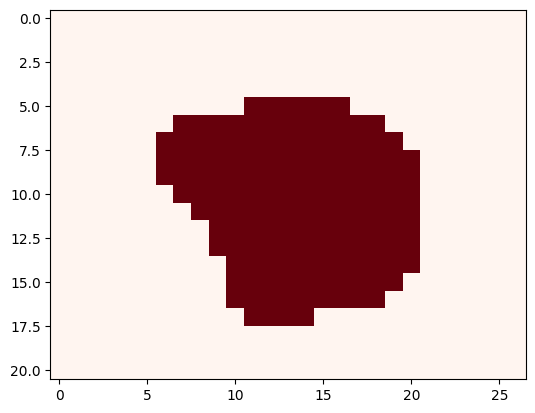

In [37]:
roi = viewer.layers['roi'].data
plt.imshow(roi, cmap='Reds');

Access `neuropil` layer and plot it in notebook.

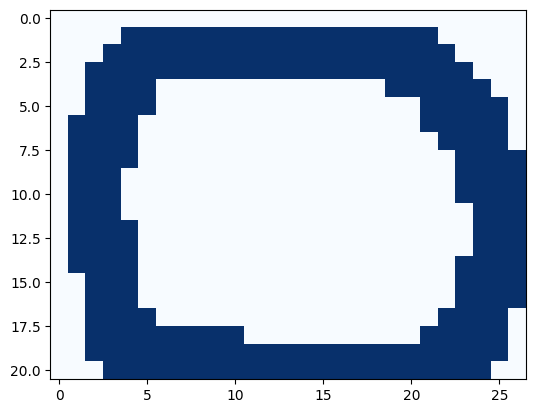

In [38]:
npil = viewer.layers['neuropil'].data
plt.imshow(npil, cmap='Blues');

The changes made in a layer in napari is reflected within jupyter notebook.

Modify neuropil mask be adding or deleting a few pixels within the mask (erasor tool) and access the layer again in jupyter notebook.

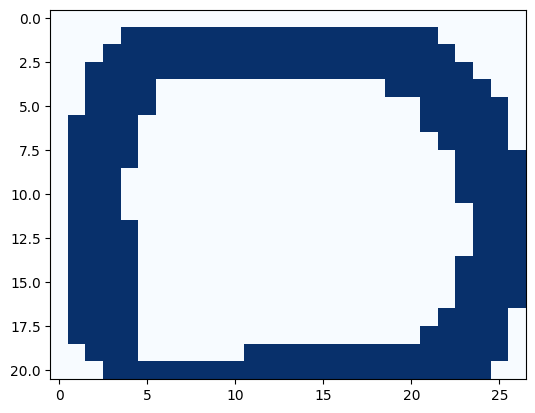

In [40]:
npil = viewer.layers['neuropil'].data
plt.imshow(npil, cmap='Blues');

### Saving and Loading ROIs.

**Example** Save `roi` layer to `roi.npy` file.

In [42]:
roi = viewer.layers['roi'].data
np.save('roi.npy', roi)

Save `neuropil` layer to `npil.npy` file

In [43]:
npil = viewer.layers['neuropil'].data
np.save('npil.npy', npil)

**Example** Load `roi.npy` as `ROI` layer.

In [44]:
roi_from_file = np.load('roi.npy')
viewer.add_labels(roi_from_file, name="ROI")

<Labels layer 'ROI' at 0x15c9802efc0>

Load `npil.npy` as `NPIL` layer.

In [45]:
npil_from_file = np.load('npil.npy')
viewer.add_labels(npil_from_file, name="NPIL")

<Labels layer 'NPIL' at 0x15c908d3bf0>